# Data collection from Rankingthebrands.com

__Purpose__

The purpose of this Jupyter notebook is to capture data from RankingTheBrands.com's "Best Global Brands" for the years 2007 - 2022.

To collect the data, we repeatedly visit the website for RankingTheBrands, for each year. Subsequently, we parse the data from the ranking table (as seen on the screenshot below).

The data is saved as a flattened CSV file, as well as an Excel file w/ yearly data in individual tabs.

<div>
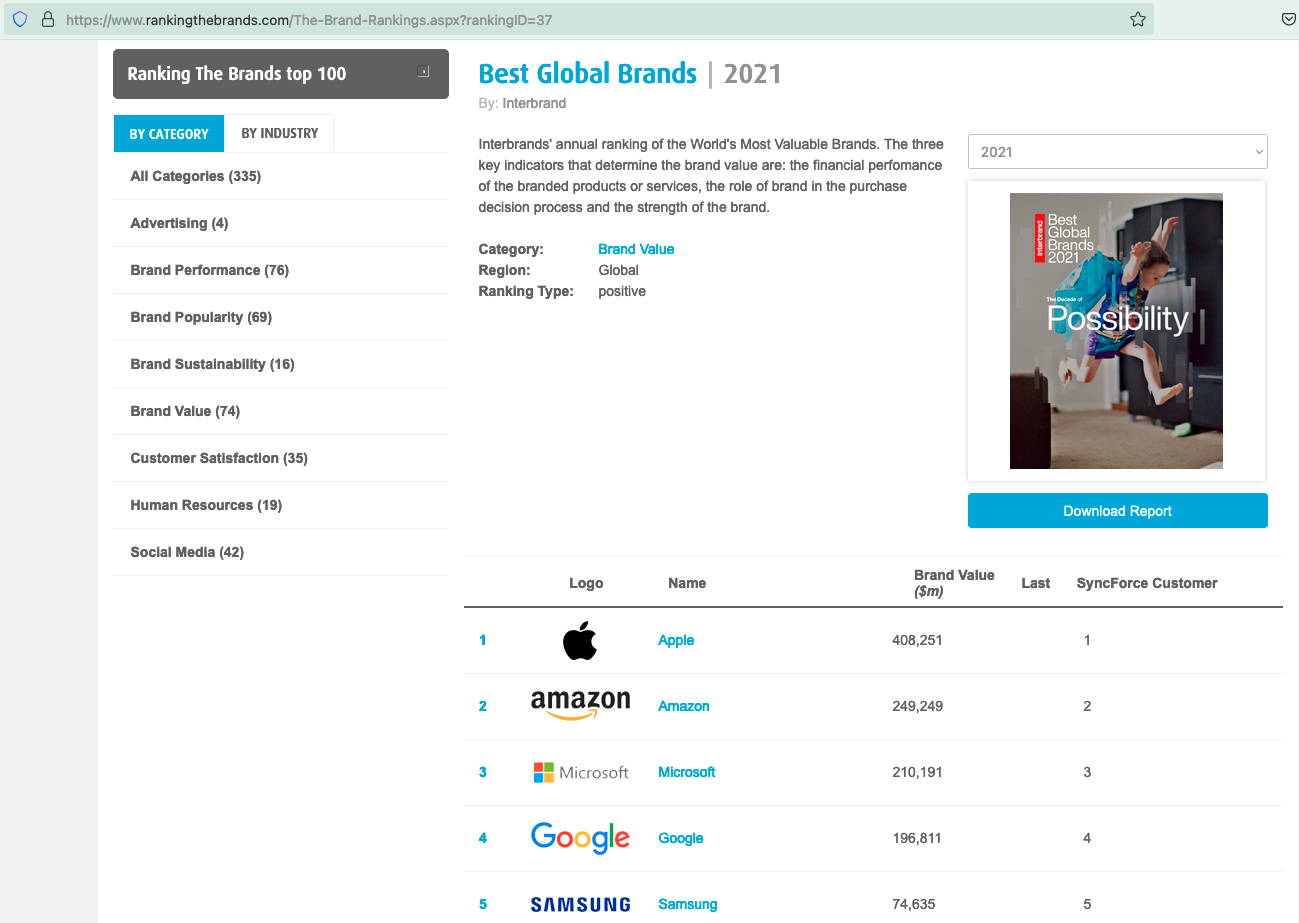
</div>

*Screenshot of Rankingthebrands.com, captured on 10 June 2022.*

__How to run this Notebook?__

(1) In the cloud
Go to colab.google.com, and import this Notebook (`.ipynb`). Click on "Run". The output data will be stored on Google Colab.

(2) On local computer
It is best to install Jupyter Notebook via the Anaconda distribution. 

1. Go to the https://www.anaconda.com/products/distribution link and install Anaconda on your computer.
2. Place this file (`webscraping_ranking_the_brands.ipynb`) on your Desktop, or any other folder of your choice.
3. Open Anaconda Navigator, and launch Jupyter Notebook (which launches in your browser).
4. Go to the folder that you placed the `webscraping_ranking_the_brands.ipynb` file
5. Run the code by clicking on Cell --> Run cells.

## Loading required packages

In [ ]:
!pip install BeautifulSoup4
!pip install pandas
!pip install requests

from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

## Build list of URLs to capture data from

In [37]:
# The base URL will be appended w/ an ID number for the respective years,
# as manually looked up on the website.

base_url = "https://www.rankingthebrands.com/The-Brand-Rankings.aspx?rankingID=37&year="

sample = []

for num in range(2007,2022):
    if num == 2007:
        yearID = "37"
    elif num == 2008:
         yearID = "38"   
    elif num == 2009:
         yearID = "72" 
    elif num == 2010:
         yearID = "214"
    elif num == 2011:
         yearID = "368"
    elif num == 2012:
         yearID = "523"
    elif num == 2013:
         yearID = "697"
    elif num == 2014:
         yearID = "857"
    elif num == 2015:
         yearID = "985"
    elif num == 2016:
         yearID = "1096"
    elif num == 2017:
         yearID = "1176"
    elif num == 2018:
         yearID = "1231"
    elif num == 2019:
         yearID = "1273"
    elif num == 2020:
         yearID = "1342"  
    elif num == 2021:
         yearID = "1391"    
    
    # create object w/ targeted year ("year") and url ("url") from which to capture the data
    sample.append({'year': num, 'url': base_url + yearID})

## Define parsing function for one year
Note: sample is a JSON dictionary w/ `year` and the corresponding `url` as attributes

In [38]:
def get_brand_data(sample):
    # open website
    request_object = requests.get(sample['url'])
    
    # convert website's source code into navigable tree
    source_code = request_object.text
    soup = BeautifulSoup(source_code, "html.parser")
    
    # identify rows in the brand ranking table
    rows = soup.find_all(class_='top100row')
    
    # extract items from each row of the table
    data = []
    for row in rows:
        tmp = {}
        tmp['year'] = int(sample['year'])
        tmp['rank'] = int(row.find(class_='pos').text)
        tmp['brand'] = row.find(class_='name').text
        tmp['value'] = int(row.find(class_='weighted').text.replace(',', ''))
        data.append(tmp)
        
    # return data
    return(data)

## Collect data

In [39]:
# Loop through all years
data = []
for item in sample:
    print('retrieving data for year ' + str(item['year']) + '...')
    data.append(get_brand_data(item))
    time.sleep(1)

retrieving data for year 2007...
retrieving data for year 2008...
retrieving data for year 2009...
retrieving data for year 2010...
retrieving data for year 2011...
retrieving data for year 2012...
retrieving data for year 2013...
retrieving data for year 2014...
retrieving data for year 2015...
retrieving data for year 2016...
retrieving data for year 2017...
retrieving data for year 2018...
retrieving data for year 2019...
retrieving data for year 2020...
retrieving data for year 2021...


## Storing the data
### Flat CSV & Excel file

In [46]:
# Flatten data
flat_data = []
for i in data:
    for row in i:
        flat_data.append(row)

# Convert to pandas data frame
df = pd.DataFrame.from_dict(flat_data)

# Convert to CSV
df.to_csv('rankingthebrands.csv', index = False)

with pd.ExcelWriter('rankingthebrands.xlsx') as writer:  
    df.to_excel(writer, sheet_name='brandvalues', index=False) 

### Excel file w/ individual tabs

In [47]:
with pd.ExcelWriter('rankingthebrands_in_tabs.xlsx') as writer:  
    for i in data:
        df = pd.DataFrame.from_dict(i)
        sheetName = "BrandNames" + str(i[0]['year'])
        df.to_excel(writer, sheet_name=sheetName, index=False) 